# 逻辑回归
构建模型预测某个学生是否能被大学录取，你有之前申请学生的两次考试成绩和最终录取的结果，需要你构建一个评估录取的分类模型。

## 绘制样本图像

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam1', 'Exam2', 'Admitted'])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [71]:
data.describe()

,Exam1,Exam2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


绘制训练集中的样本数据，positive表示接受，negative表示未接受

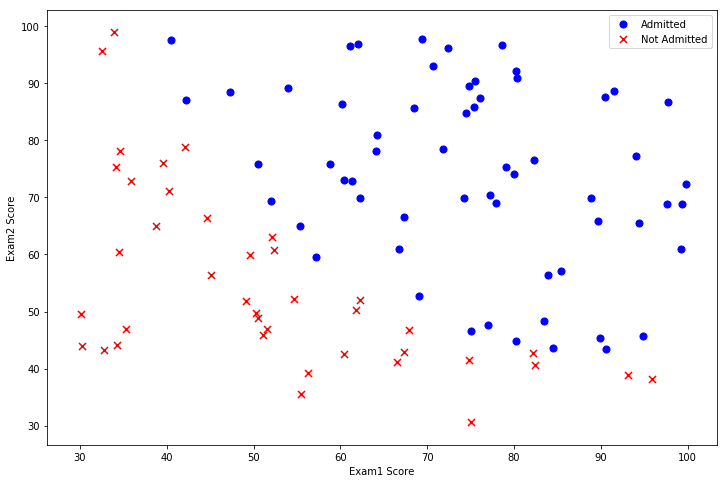

In [72]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')
plt.show()

## sigmoid函数

![](img/sigmoid.png)

In [73]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

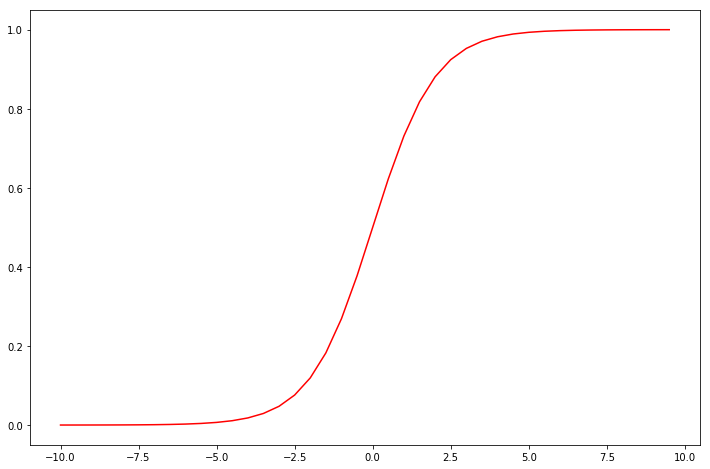

In [74]:
nums = np.arange(-10, 10, step=0.5)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(nums, sigmoid(nums), 'r')
plt.show()

## 代价函数

![](img/cost.png)

In [75]:
def cost(theta, X, Y):
    first = Y * np.log(sigmoid(X@theta.T))
    second = (1 - Y) * np.log(1 - sigmoid(X@theta.T))
    return -1 * np.mean(first + second)

预处理数据

In [76]:
# add ones column
data.insert(0, 'Ones', 1)

In [77]:
# set X(training data) and Y(target variable)
X = data.iloc[:, 0: -1].values
Y = data.iloc[:, -1].values
theta = np.zeros(3)

检查矩阵的维度

In [78]:
theta

array([0., 0., 0.])

In [79]:
X.shape, Y.shape, theta.shape

((100, 3), (100,), (3,))

计算初始的代价（theta=0）

In [80]:
cost(theta, X, Y)

0.6931471805599453

## 梯度下降

![](img/gradient.png)

[偏导的推导过程](https://sanzo.top/#/post/学习笔记/机器学习?id=梯度下降)

In [94]:
# 计算步长
def gradient(theta, X, Y):
#     return (1/len(X) * X.T @ (sigmoid(X @ theta.T) - Y))
    return 1/len(X) *  (sigmoid(X @ theta.T) - Y) @ X

#     theta = np.matrix(theta)
#     X = np.matrix(X)
#     Y = np.matrix(Y)
    
#     parameters = int(theta.ravel().shape[1])
#     grad = np.zeros(parameters)
#     print(X.shape, theta.shape, (theta.T).shape, (X*theta.T).shape)
#     error = sigmoid(X * theta.T) - Y
    
#     for i in range(parameters):
#         term = np.multiply(error, X[:, i])
#         grad[i] = np.sum(term) / len(X)
        
#     return grad

In [96]:
gradient(theta, X, Y)

array([ -0.1       , -12.00921659, -11.26284221])

gradient只是计算了梯度下降$\theta$更新的步长，使用Scipy.optimize.fmin_tnc拟合最优的$\theta$

## 拟合参数

In [98]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, Y))
result

(array([-25.16131867,   0.20623159,   0.20147149]), 36, 0)

In [99]:
type(result)

tuple

In [100]:
cost(result[0], X, Y)

0.20349770158947428

使用Scipy.optimize.minimize拟合最优的$\theta$

In [53]:
res = opt.minimize(fun=cost, x0=np.array(theta), args=(X, np.array(Y)), method='Newton-CG', jac=gradient)
res

     fun: 0.20349770159082373
     jac: array([-1.11232496e-05, -7.41503794e-04, -6.38123690e-04])
 message: 'Optimization terminated successfully.'
    nfev: 73
    nhev: 0
     nit: 29
    njev: 253
  status: 0
 success: True
       x: array([-25.16143003,   0.20623248,   0.20147238])

In [54]:
cost(res.x, X, Y)

0.20349770159082373

## 预测分析

根据$\theta$进行预测：${h_\theta(x)=\frac{1}{1+e^{-\theta^TX}}}$

$h_\theta\ge0.5$, 预测$y=1$

$h_\theta<0.5$, 预测$y=0$

In [55]:
def predict(theta, X):
    probability = sigmoid(X @ theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

模型准确率

In [56]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if a^b == 0 else 0 for (a,b) in zip(predictions, Y)]
accuracy = (sum(correct) / len(correct))
print('accuracy = {0:.0f}%'.format(accuracy*100))

accuracy = 89%


In [63]:
sum([1 if a&b == 1 else 0 for (a,b) in zip(predictions, Y)])

55

In [22]:
# support标签中出现的次数
# precision查准率，recall召回率，f1-score调和平均数
from sklearn.metrics import classification_report
print(classification_report(Y, predictions))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



## 决策边界

![](img/decision_boundary.png)

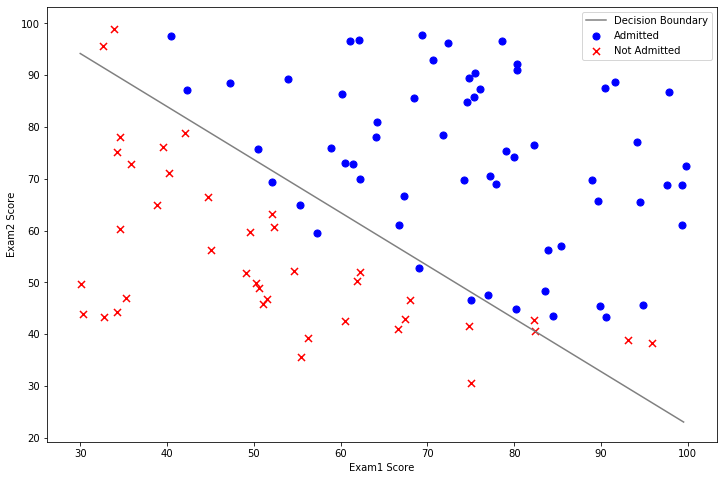

In [23]:
coef = -res.x / res.x[2]
x = np.arange(30, 100, 0.5)
y = coef[0] + coef[1] * x

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.plot(x, y, label='Decision Boundary', c='grey')
ax.legend()
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')
plt.show()